# Apriori

The **Apriori algorithm** is a fundamental technique in data mining, used to extract **association rules** from a set of transactions. It identifies patterns in which items frequently appear together, such as products bought in pairs.

### Story Behind Apriori
Famous retail case as an example:

A data analysis of thousands of transactions revealed a surprising pattern: **people buying diapers were also likely to buy beer**, particularly during certain hours. This pattern wasn’t something one could guess but was uncovered through data, leading to strategic decisions like how products should be arranged in stores.

### Goal of Apriori
The goal of the Apriori algorithm is to uncover **association rules** that show relationships between items, like "if a customer buys item A, they are likely to also buy item B." This approach can be applied to many scenarios, like **movie recommendations** (users who liked one movie may like another) or **market basket analysis** (customers who buy certain groceries together).


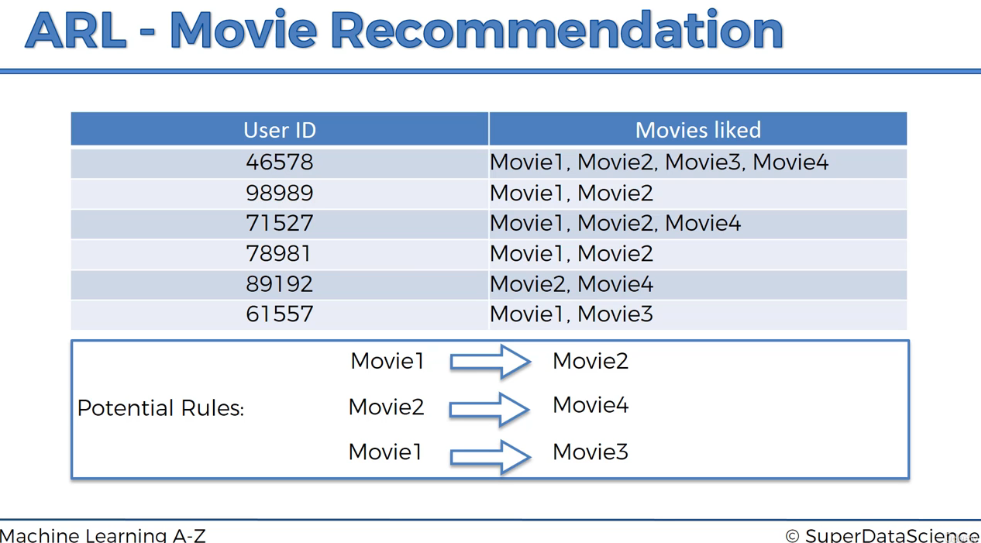


### Key Concepts of Apriori
1. **Support**: Measures how frequently an itemset appears in the dataset.
   - Formula: \( $\text{Support} = \frac{\text{Number of transactions containing itemset}}{\text{Total number of transactions}}$ \)
   - Example: If 10 out of 100 people watched a specific movie, the support for that movie is 10%.

2. **Confidence**: Measures the likelihood of one item being purchased, given that another item was also purchased.
   - Formula: \( $\text{Confidence} = \frac{\text{Number of transactions containing both items}}{\text{Number of transactions containing the first item}}$ \)
   - Example: If 7 out of 40 people who watched **Interstellar** also watched **Ex Machina**, the confidence for the rule "people who watched Interstellar also watched Ex Machina" is \( $\frac{7}{40} = 17.5\%$ \). We take into account that the initial population is 100, of which 40 have watched Interestellar, of which 7 have also watched Ex Machina.


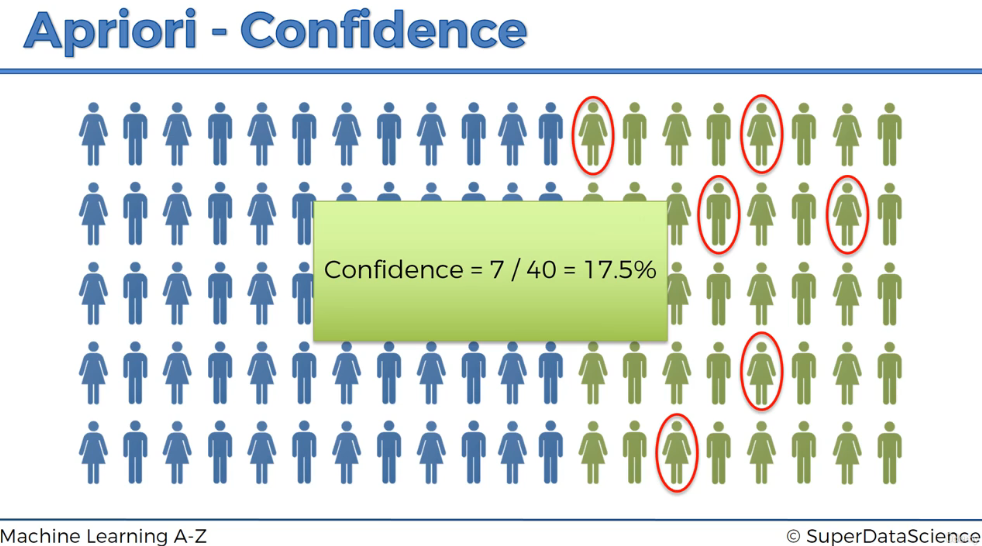


3. **Lift**: Measures how much more likely item B is to be bought when item A is bought, compared to just randomly buying item B.
   - Formula: \( $\text{Lift} = \frac{\text{Confidence}}{\text{Support of the second item}}$ \)
   - Example: If the confidence that people who watched **Interstellar** also watched **Ex Machina** is 17.5%, and the general support for **Ex Machina** is 10%, then the lift is \( $\frac{17.5}{10} = 1.75$ \). A lift greater than 1 indicates a positive association between the two items.
   - It is like asking: "Have you seen Interstellar?" If they have, then we'll recommend "Ex Machina." So, what is the likelihood that a person will actually like "Ex Machina," if we recommend them that way? So if you randomly recommend the movie "Ex Machina" to someone, the likelihood of them liking it is 10%. However, if you first ask if they've seen and liked "Interstellar" and then recommend "Ex Machina," the likelihood of success increases to 17.5%. The "lift" measures the improvement in recommendation accuracy, it is calculated as the ratio of these two probabilities (17.5% / 10%), resulting in a lift value of 1.75.


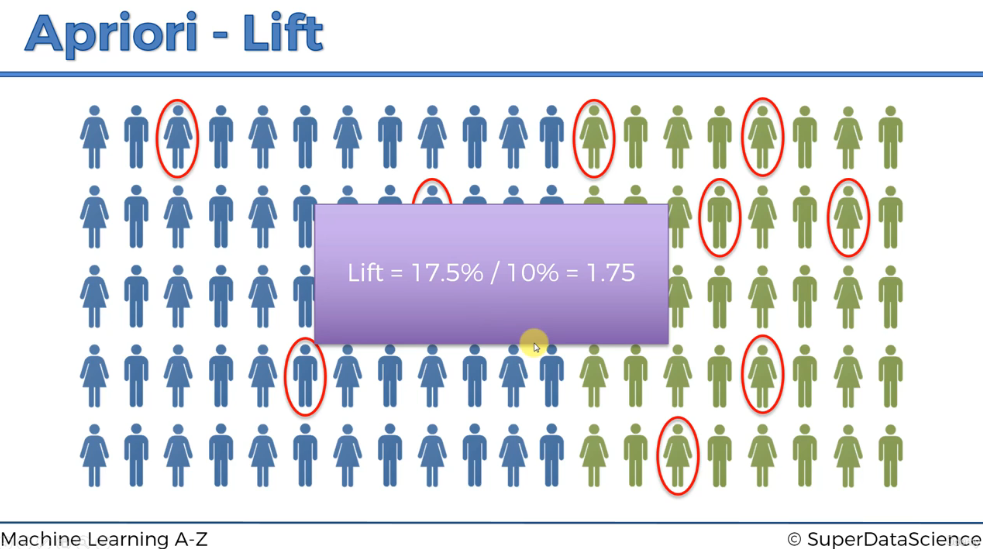


### How Apriori Works:
- **Step 1: Set minimum thresholds for Support and Confidence**: Before running the algorithm, you set a **minimum support** and **minimum confidence** to filter out weak rules.
- **Step 2: Identify frequent itemsets**: Take all the subsets in transactions having higher support than minimum support.
  - Apriori looks for itemsets that meet the minimum support criteria.
- **Step 3: Generate rules**: From the frequent itemsets, the algorithm generates rules and calculates their confidence. Take all the rules of these subsets having higher confidence than minimum confidence.
- **Step 4: Rank by lift**: The rules are then sorted by lift, with the highest lift indicating the strongest associations. Sort the rules by decreasing lift.

### Practical Uses:
- **Retail**: Discovering associations between products (like the famous "diapers and beer" example) helps with store layout and marketing.
- **Recommender Systems**: Companies like Netflix or Amazon use similar logic to suggest movies or products, though they use more advanced algorithms beyond basic Apriori (they usually combine different models).


## Importing the libraries

In [1]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5953 sha256=33db1eed07b3fd8cd7f23e003498e7e458a7a1cd8de4a4940a0e59e84b3bae9a
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data Preprocessing

**Dataset**: The dataset is called "Market Basket Optimization", which is used to perform association rule learning for market basket analysis.
- Imagine a small shop in the south of France, where the owner wants to boost sales by identifying strong associations between products that customers frequently buy together.
- The goal is to offer promotions like "buy this, get that for free."

The dataset contains 7,500 transactions collected over a week, with each row representing a customer’s basket of purchased items.

The task of the data scientist is to analyze these transactions and return the best association rules to help the owner create effective deals for customers.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Importing the dataset from a CSV file in Google Drive, without headers
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning A-Z/Part 5 - Association Rule Learning/1 Apriori/Market_Basket_Optimisation.csv', header = None)

# Initializing an empty list to store transactions
transactions = []

# Looping through each transaction (row) in the dataset (7501 transactions in total)
for i in range(0, 7501):
  # For each transaction, creating a list of items in the transaction (20 items per row) and converting them to strings
  transactions.append([str(dataset.values[i,j]) for j in range(0, 20)])

## Training the Apriori model on the dataset

In [5]:
# Import the apriori algorithm from the apyori package
from apyori import apriori

# Applying the apriori algorithm on the transactions dataset
# transactions: the list of all transactions from the dataset
# min_support: the minimum support threshold (0.003 means the product is bought at least 0.3% of the time)
# min_confidence: the minimum confidence threshold (0.2 means rules should have at least 20% confidence)
# min_lift: the minimum lift threshold (3 means the association should increase the likelihood by at least 3 times)
# min_length: the minimum number of items in the rule (2 means the rule should consist of at least two items)
# max_length: the maximum number of items in the rule (2 means the rule can have at most two items)
rules = apriori(transactions = transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)

**min_support**
   - **Calculation**: We want to consider products that appear in at least 3 transactions per day. Since the data spans **7 days**, this amounts to **21 transactions per week**.
   - **Support Definition**: Support is the frequency of a product pair occurring in the transactions. To compute the minimum support, we divide the number of transactions where a product pair appears by the total number of transactions (7501).
   - **Formula**: $\text{min_support} = \frac{21}{7501} = 0.0027 \approx 0.003$
   - **Explanation**: This means that the rule will only be considered if the product pair appears in at least **0.3%** of the transactions.

**min_confidence**
   - **Calculation**: The confidence threshold was chosen experimentally. Initially, a high value of **0.8** was used, but it resulted in no rules. After trial and error, a value of **0.2** was found to yield a good number of relevant rules.
   - **Explanation**: The **confidence** of a rule is the percentage of transactions where the rule holds true. A confidence of **0.2** (20%) means the rule needs to be correct at least 20% of the time.

**min_lift**
   - **Calculation**: Based on experience and rule-of-thumb, a **lift** value of **3** was chosen. This indicates that the occurrence of the right-hand-side product (B) is at least 3 times more likely when the left-hand-side product (A) is present.
   - **Explanation**: Lift measures the relevance of the rule. A **lift** of **3** ensures that the product pair has significant associative strength.

**min_length** and **max_length**
   - **min_length = 2** and **max_length = 2**
   - **Explanation**: In the context of the problem, the goal is to find rules involving exactly **two products**: one on the left-hand side (product A) and one on the right-hand side (product B). Setting both the minimum and maximum length to **2** ensures that the rules generated will only include two products.


## Visualising the results

### Displaying the first results coming directly from the output of the apriori function

In [6]:
# Convert the generated rules from the Apriori algorithm into a list for easier viewing and manipulation
results = list(rules)

In [7]:
results

[RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'honey', 'fromage blanc'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0

Let's analyze one of the examples:

`
RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)])
`

This rule represents an association discovered by the Apriori algorithm, and it is broken down into several components. Overall, the rule suggests that **if a customer buys light cream, there is a 29.1% chance that they will also buy chicken**, and this is **4.84 times more likely than random chance**. The combination of *chicken* and *light cream* appears in about **0.45% of transactions** in the dataset.

Let's explain each part in detail:

1. **Items: `frozenset({'chicken', 'light cream'})`**
   - This is the set of items (products) involved in the association rule. In this case, the rule involves two products: *chicken* and *light cream*.
   - The `frozenset` is a data structure similar to a set, but it's immutable (i.e., it cannot be changed after being created).

2. **Support: `0.004532728969470737`**
   - **Support** refers to the proportion of transactions that contain both *chicken* and *light cream* together.
   - Here, the support is approximately `0.0045`, meaning that around **0.45%** of the transactions in the dataset included both products.
   - In absolute terms, this is about 34 out of 7501 transactions (since 7501 * 0.0045 ≈ 34).

3. **Ordered Statistics**
   - This part contains details about the rule's direction, confidence, and lift.

   - **Base Items: `frozenset({'light cream'})`**
     - The **base item** in the rule is *light cream*, which is the product on the left-hand side (LHS) of the rule.
     - This means that the rule is considering what happens when *light cream* is purchased.

   - **Added Items: `frozenset({'chicken'})`**
     - The **added item** is *chicken*, which is on the right-hand side (RHS) of the rule.
     - This implies the rule suggests that if a customer buys *light cream*, they are likely to also buy *chicken*.

   - **Confidence: `0.29059829059829057`**
     - **Confidence** is the conditional probability that *chicken* is purchased when *light cream* is purchased.
     - Here, the confidence is approximately **29.1%**, meaning that when a customer buys *light cream*, there is a 29.1% chance they will also buy *chicken*.

   - **Lift: `4.84395061728395`**
     - **Lift** is a measure of how much more likely the association is compared to random chance.
     - A lift of **4.84** means that customers who buy *light cream* are about **4.84 times more likely** to also buy *chicken* compared to customers picking products at random.
     - A lift greater than 1 indicates a strong association between the two items.



### Putting the results well organised into a Pandas DataFrame

In [8]:
def inspect(results):
    # Extract the Left Hand Side (LHS) of the rule, which is the first item in the ordered statistic
    lhs         = [tuple(result[2][0][0])[0] for result in results]

    # Extract the Right Hand Side (RHS) of the rule, which is the second item in the ordered statistic
    rhs         = [tuple(result[2][0][1])[0] for result in results]

    # Extract the support for each rule (the second element in each result)
    supports    = [result[1] for result in results]

    # Extract the confidence of each rule (the third element in the ordered statistic)
    confidences = [result[2][0][2] for result in results]

    # Extract the lift of each rule (the fourth element in the ordered statistic)
    lifts       = [result[2][0][3] for result in results]

    # Return a list of tuples with LHS, RHS, support, confidence, and lift for each rule
    return list(zip(lhs, rhs, supports, confidences, lifts))

# Convert the inspected results into a DataFrame for better readability
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

### Displaying the results non sorted

In [9]:
resultsinDataFrame

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,light cream,chicken,0.004533,0.290598,4.843951
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
2,pasta,escalope,0.005866,0.372881,4.700812
3,fromage blanc,honey,0.003333,0.245098,5.164271
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
6,light cream,olive oil,0.003200,0.205128,3.114710
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
8,pasta,shrimp,0.005066,0.322034,4.506672


### Displaying the results sorted by descending lifts

In [10]:
# Retrieve the top 10 rules with the highest Lift value from the DataFrame
resultsinDataFrame.nlargest(n = 10, columns = 'Lift')

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
3,fromage blanc,honey,0.003333,0.245098,5.164271
0,light cream,chicken,0.004533,0.290598,4.843951
2,pasta,escalope,0.005866,0.372881,4.700812
8,pasta,shrimp,0.005066,0.322034,4.506672
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
6,light cream,olive oil,0.003200,0.205128,3.114710


Let's explain the first line:

This rule indicates a relationship between **fromage blanc** (left-hand side) and **honey** (right-hand side) in the context of transaction data. Overall, the rule implies that customers who buy **fromage blanc** are quite likely to also buy **honey**, making it a valuable insight for marketing or promotional strategies.


Here's a breakdown of each metric:

- **Support (0.003333)**: This means that the combination of **fromage blanc** and **honey** appears in approximately 0.33% of all transactions. A low support suggests that this combination is not very common in the dataset.

- **Confidence (0.245098)**: This indicates that when **fromage blanc** is purchased, there is about a 24.5% chance that **honey** will also be purchased. This is a measure of the strength of the association.

- **Lift (5.164271)**: A lift value greater than 1 indicates that the occurrence of **fromage blanc** increases the likelihood of purchasing **honey** significantly (by about 5.16 times) compared to what would be expected if the purchases were independent. This high lift suggests a strong positive association between the two products.